¡Hola, Daniel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

# Instrucción 1. Prepara los datos.

# 1.1. Abre los archivos y examina los datos. 

In [1]:
# Cargar todas las librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Cargar los datasets

df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Información general de los datasets
print("\nTrain dataset info:")
print(df_train.info())

print("\nTest dataset info:")
print(df_test.info())

print("\nFull dataset info:")
print(df_full.info())


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               167

In [4]:
# Mostrar las primeras filas de cada dataset
print("Train dataset:")
print(df_train.head())

print("\nTest dataset:")
print(df_test.head())

print("\nFull dataset:")
print(df_full.head())

Train dataset:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501  

In [5]:
# Estadísticas generales de los datasets
print("\nTrain dataset - Descripción:")
print(df_train.describe())

print("\nTest dataset - Descripción:")
print(df_test.describe())

print("\nFull dataset - Descripción:")
print(df_full.describe())


Train dataset - Descripción:
       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                       

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 22627.000000                 22629.000000   
mean                      4.781559                     9.095308   
std                       2.030128                     3.230797   
min                       0.000000                     0.000000   
25%                       4.018525                     8.750171   
50%                       4.953729                     9.914519   
75%                       5.862593                    10.929839   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  22331.000000                 22630.000000   
mean                       8.640317                    40.001172   
std                        3.785035                    13.398062   
min                        0.000000                     0.000000   
25%                        7.116799                    4

In [6]:
# Mostrar número de filas y columnas

print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [7]:
# Ver cantidad de valores nulos en cada columna
print("\nValores nulos en Train dataset:")
print(df_train.isna().sum())

print("\nValores nulos en Test dataset:")
print(df_test.isna().sum())

print("\nValores nulos en Full dataset:")
print(df_full.isna().sum())


Valores nulos en Train dataset:
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

Valores nulos en Test dataset:
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cl

In [8]:
# Valores duplicados

print("Valores duplicados: ", df_train.duplicated().sum())
print("Valores duplicados: ", df_test.duplicated().sum())
print("Valores duplicados: ", df_full.duplicated().sum())

Valores duplicados:  0
Valores duplicados:  0
Valores duplicados:  0


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
Excelente trabajo con la carga de las bases de datos con los análisis iniciales de la limpieza de los datos. 



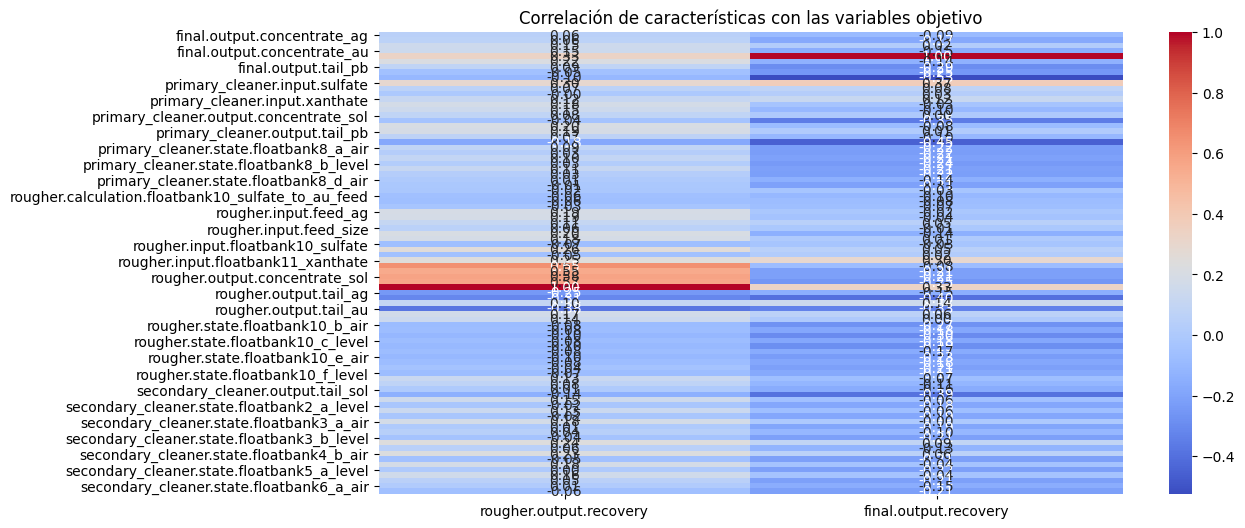

In [9]:
# Calcular correlación con respecto a las variables objetivo
corr_matrix = df_train.corr()

# Extraer la correlación de las características con las variables objetivo
target_cols = ['rougher.output.recovery', 'final.output.recovery']
corr_targets = corr_matrix[target_cols]

# Graficar el mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlación de características con las variables objetivo")
plt.show()

- Se generó un mapa de calor únicamente para df_train que es el conjunto de datoscon el cual se entrena el modelo, así que es crucial analizar la correlación.
- Con respecto a df_test aunque también tiene valores nulos, no contiene las variables objetivo. La correlación no sería útil aquí.
- Para df_full, como contiene tanto entrenamiento como prueba, se podría hacer el análisis, pero sería redundante porque ya se está haciendo en df_train.
- Lo más eficiente es generar el mapa de calor solo para df_train, ya que es el dataset que realmente afectará nuestro modelo.


**Ya que el mapa de calor es poco legible, se decidió extraer solo las variables con alta correlación (mayor a 0.5) y enfocarse en estas.**

In [10]:
# Definir el umbral de correlación
umbral = 0.5

# Filtrar las variables con alta correlación con las variables objetivo
corr_train = df_train.corr()

# Variables correlacionadas con "rougher.output.recovery"
high_corr_rougher = corr_train['rougher.output.recovery'].abs().sort_values(ascending=False)
high_corr_rougher = high_corr_rougher[high_corr_rougher > umbral].index.tolist()

# Variables correlacionadas con "final.output.recovery"
high_corr_final = corr_train['final.output.recovery'].abs().sort_values(ascending=False)
high_corr_final = high_corr_final[high_corr_final > umbral].index.tolist()

# Unir las listas de variables altamente correlacionadas
high_corr_vars = list(set(high_corr_rougher + high_corr_final))

print(f"Variables con alta correlación:\n {high_corr_vars}")

Variables con alta correlación:
 ['rougher.output.recovery', 'rougher.output.concentrate_ag', 'final.output.recovery', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'final.output.tail_au', 'rougher.output.concentrate_pb']


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>

Gran trabajo con el análisis de correlaciones y la identificación de variables con alta correlación    


**Se procederá a la imputación de valores clave con la mediana y la interpolación para mantener la integridad del conjunto de datos. Solo se eliminarán registros si el porcentaje de valores faltantes es demasiado alto.**


In [11]:
# Imputar valores nulos en variables clave con la mediana

df_train[high_corr_vars] = df_train[high_corr_vars].fillna(df_train[high_corr_vars].median())

In [12]:
# Aplicar interpolación temporal en las columnas numéricas

df_train.interpolate(method='linear', inplace=True)

In [13]:
# Definir un umbral de valores nulos por fila (ajustable según criterio)

umbral_nulos = df_train.shape[1] * 0.3  # Si más del 30% de valores están vacíos, se elimina la fila

# Eliminar filas que superen el umbral

df_train.dropna(thresh=umbral_nulos, inplace=True)

In [14]:
# Revisar si todavía hay valores nulos después de la limpieza

print("\nValores nulos en df_train después de la limpieza:")
print(df_train.isna().sum())


Valores nulos en df_train después de la limpieza:
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


**Ahora, se procederá a revisar columnas en común entre los datasets train y test, lo cual permite construir un modelo sólido y listo para predecir correctamente en datos reales, pues evita errores ya que si se usan columnas que no existen en df_test, el modelo no podrá hacer predicciones correctamente, además garantiza generalización, lo que asegura que el modelo pueda aplicarse a nuevos datos sin problemas. Por último, optimiza el entrenamiento, ya que filtra solo las variables útiles, evitando información innecesaria.**

In [15]:
# Obtener las columnas de cada dataset
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

# Identificar las columnas en común
common_columns = train_columns.intersection(test_columns)

print(f"Total de columnas en df_train: {len(train_columns)}")
print(f"Total de columnas en df_test: {len(test_columns)}")
print(f"Total de columnas en común: {len(common_columns)}")
print("\nColumnas en común entre df_train y df_test:")
print(common_columns)

Total de columnas en df_train: 87
Total de columnas en df_test: 53
Total de columnas en común: 53

Columnas en común entre df_train y df_test:
{'secondary_cleaner.state.floatbank2_a_air', 'rougher.state.floatbank10_e_level', 'secondary_cleaner.state.floatbank5_a_air', 'rougher.input.feed_rate', 'primary_cleaner.input.depressant', 'rougher.input.floatbank10_xanthate', 'rougher.input.feed_size', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_c_level', 'secondary_cleaner.state.floatbank2_a_level', 'primary_cleaner.state.floatbank8_c_air', 'rougher.input.feed_ag', 'primary_cleaner.state.floatbank8_b_level', 'rougher.input.feed_pb', 'secondary_cleaner.state.floatbank2_b_air', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.input.sulfate', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank4_a_air', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_

# 1.2. Comprueba que el cálculo de la recuperación sea correcto.

In [16]:
# Calcular la recuperación estimada
df_train['calculated_recovery'] = (df_train['rougher.output.concentrate_au'] * 
                                   (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / \
                                  (df_train['rougher.input.feed_au'] * 
                                   (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100

# Calcular el Error Absoluto Medio (EAM)
eam = np.mean(np.abs(df_train['rougher.output.recovery'] - df_train['calculated_recovery']))

# Mostrar el resultado
print(f"Error Absoluto Medio (EAM) entre cálculo y valores reales: {eam:.4f}")

Error Absoluto Medio (EAM) entre cálculo y valores reales: inf


In [ ]:
np.mean(np.abs(df_train['rougher.output.recovery'] - df_train['calculated_recovery']))

In [21]:
df_train['calculated_recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: calculated_recovery, Length: 16860, dtype: float64

In [22]:
df_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

**Se observa que el resultados del EAM no es un valor finito, pues su resultado es "inf", haciendo alusión a infinito, se detectó que contiene valores de divisiones por cero, lo que significa que en algún punto del cálculo se divide por un valor que es 0.**

**Se procederá a verificar si hay valores 0 en las columnas clave y si es así, se definirá un valor epsilon pequeño para evitar divisiones por cero.**

In [17]:
# Verificar si hay valores 0 en las columnas clave
zero_values = df_train[['rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.input.feed_au']] == 0

print("\nCantidad de valores cero en variables clave:")
print(zero_values.sum())


Cantidad de valores cero en variables clave:
rougher.output.concentrate_au    1493
rougher.output.tail_au              0
rougher.input.feed_au            1213
dtype: int64


In [18]:
# Definir un valor epsilon pequeño para evitar divisiones por cero
epsilon = 1e-5

# Calcular la recuperación ajustada
df_train['calculated_recovery'] = (df_train['rougher.output.concentrate_au'] * 
                                   (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / \
                                  ((df_train['rougher.input.feed_au'] + epsilon) * 
                                   (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'] + epsilon)) * 100

# Calcular el Error Absoluto Medio (EAM)
eam = np.mean(np.abs(df_train['rougher.output.recovery'] - df_train['calculated_recovery']))

print(f"Error Absoluto Medio (EAM) entre cálculo y valores reales: {eam:.4f}")

Error Absoluto Medio (EAM) entre cálculo y valores reales: 145259.0630


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
    
Excelente trabajo con el calculo de la recuperación con los calculos propios, esto ayuda mucho a comprobar los resultados. Recuerda que estos pasos son muy relevantes cuando queremos hacer los análisis de información. 



**Se hace necesario hacer una validación adicional antes de continuar, ya que el EAM es demasiado alto, lo que sugiere que hay una discrepancia entre los cálculos y los valores reales.**

**Se verificarán las estadísticas de las variables clave y la detección de valores extremos (outliers).**

In [19]:
# Verificar estadísticas de las variables clave
print("\nResumen estadístico de variables clave:")
print(df_train[['rougher.output.recovery', 'rougher.input.feed_au', 
                'rougher.output.concentrate_au', 'rougher.output.tail_au']].describe())


Resumen estadístico de variables clave:
       rougher.output.recovery  rougher.input.feed_au  \
count             16860.000000           16860.000000   
mean                 82.827887               7.140138   
std                  13.934638               3.029035   
min                   0.000000               0.000000   
25%                  80.922825               6.176626   
50%                  85.235997               7.429134   
75%                  89.343361               8.954083   
max                 100.000000              14.093363   

       rougher.output.concentrate_au  rougher.output.tail_au  
count                   16860.000000            16860.000000  
mean                       17.412450                1.841012  
std                         6.906784                0.814770  
min                         0.000000                0.020676  
25%                        17.461255                1.355256  
50%                        19.644663                1.791404  
75% 

In [20]:
# Detectar valores atípicos en las variables clave

# Definir los límites para detección de outliers
Q1 = df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].quantile(0.25)
Q3 = df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Filtrar valores fuera del rango típico
outliers = ((df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']] < (Q1 - 1.5 * IQR)) | 
            (df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']] > (Q3 + 1.5 * IQR)))

print("\nCantidad de valores atípicos en variables clave:")
print(outliers.sum())


Cantidad de valores atípicos en variables clave:
rougher.input.feed_au            1763
rougher.output.concentrate_au    2328
rougher.output.tail_au            427
dtype: int64


**Se procederá a eliminar los reistros atípicos, ya que como los outliers representan menos del 10% del dataset, lo más eficiente será descartarlos para mejorar la calidad de los datos sin afectar demasiado la cantidad de información disponible.**

In [21]:
# Filtrar los datos eliminando valores fuera del rango intercuartílico (IQR)

Q1 = df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].quantile(0.25)
Q3 = df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].quantile(0.75)
IQR = Q3 - Q1

# Mantener solo registros dentro del rango típico

df_train = df_train[~((df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']] < (Q1 - 1.5 * IQR)) | 
                       (df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificar la nueva shape del dataset

print(f"Shape de df_train después de eliminar outliers: {df_train.shape}")

Shape de df_train después de eliminar outliers: (14063, 88)


In [22]:
# Recalcular la recuperación estimada con datos limpios

df_train['calculated_recovery'] = (df_train['rougher.output.concentrate_au'] * 
                                   (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / \
                                  ((df_train['rougher.input.feed_au'] + 1e-5) * 
                                   (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'] + 1e-5)) * 100

# Calcular el Error Absoluto Medio (EAM)

eam = np.mean(np.abs(df_train['rougher.output.recovery'] - df_train['calculated_recovery']))

print(f"Error Absoluto Medio (EAM) después de la limpieza: {eam:.4f}")

Error Absoluto Medio (EAM) después de la limpieza: 0.2489


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Muy buen trabajo con el análisis de valores atípicos usando el metodo de valores  de intercuartiles



# 1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [23]:
# Verificar las columnas en cada conjunto de datos
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

# Identificar características que están en el entrenamiento pero no en la prueba
missing_in_test = train_columns - test_columns

print("Características no disponibles en el conjunto de prueba:")
print(missing_in_test)

# Identificar el tipo de cada característica ausente
print("\nTipos de datos de las características faltantes:")
print(df_train[list(missing_in_test)].dtypes)

Características no disponibles en el conjunto de prueba:
{'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_sol', 'rougher.output.recovery', 'final.output.concentrate_sol', 'final.output.tail_sol', 'final.output.tail_au', 'rougher.calculation.au_pb_ratio', 'rougher.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_pb', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'calculated_recovery', 'primary_cleaner.output.tail_au', 'final.output.tail_pb', 'final.output.concentrate_au', 'final.output.recovery', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.conc

In [24]:
# Identificar características presentes en ambos conjuntos
common_columns = train_columns.intersection(test_columns)

print("Características disponibles en ambos conjuntos:")
print(common_columns)

Características disponibles en ambos conjuntos:
{'rougher.state.floatbank10_a_air', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.state.floatbank8_d_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_level', 'rougher.state.floatbank10_d_level', 'date', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank2_a_air', 'rougher.input.floatbank10_sulfate', 'primary_cleaner.input.sulfate', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank5_a_level', 'rougher.input.feed_rate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_level', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank4_a_air', '

**Análisis de las Características en los Datos:**

1. Características no disponibles en el conjunto de prueba:

- Se encontraron **35 columnas ausentes en el conjunto de prueba**. La mayoría corresponden a **resultados finales del proceso de recuperación**, como 'final.output.recovery', 'rougher.output.recovery', y varias concentraciones ('output.concentrate' y 'output.tail').

- También se identificaron **cálculos intermedios**, como 'rougher.calculation.au_pb_ratio', que no estarán disponibles para predecir en el test.

- **Todas las variables ausentes son de tipo 'float64'**, indicando que son valores numéricos continuos.

2. Características presentes en ambos conjuntos

- Se identificaron **51 columnas comunes** en los datos de entrenamiento y prueba. Estas incluyen parámetros de proceso ('floatbank'), insumos químicos ('input.xanthate', 'input.sulfate'), tasas de alimentación ('input.feed_rate'), y valores relacionados con control ('state.floatbank').

**Conclusión**

- **Las variables ausentes en el test no pueden ser usadas en el entrenamiento del modelo.**

- **El modelo debe entrenarse solo con las características disponibles en ambos conjuntos.**

- **Es importante realizar preprocesamiento para asegurar que los datos sean utilizables por el modelo de Machine Learning.**

# 1.4. Realiza el preprocesamiento de datos.

In [25]:
if 'date' in df_train.columns:
    df_train['year'] = pd.to_datetime(df_train['date']).dt.year
    df_train['month'] = pd.to_datetime(df_train['date']).dt.month
    df_train['day'] = pd.to_datetime(df_train['date']).dt.day
    df_train.drop(columns=['date'], inplace=True)

if 'date' in df_test.columns:
    df_test['year'] = pd.to_datetime(df_test['date']).dt.year
    df_test['month'] = pd.to_datetime(df_test['date']).dt.month
    df_test['day'] = pd.to_datetime(df_test['date']).dt.day
    df_test.drop(columns=['date'], inplace=True)

print("\nDatos con fecha transformada:")
print(df_train[['year', 'month', 'day']].head())

# 🚀 **Manejo de valores faltantes**
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)

print("\nValores faltantes después de la imputación:", df_train.isnull().sum().sum())

# 🚀 **Normalización de datos numéricos**
numeric_columns_common = df_train.select_dtypes(include=['float64']).columns.intersection(df_test.select_dtypes(include=['float64']).columns)

scaler = MinMaxScaler()
df_train[numeric_columns_common] = scaler.fit_transform(df_train[numeric_columns_common])
df_test[numeric_columns_common] = scaler.transform(df_test[numeric_columns_common])

print("\nEjemplo de datos normalizados:")
print(df_train[numeric_columns_common].head())



Datos con fecha transformada:
   year  month  day
0  2016      1   15
1  2016      1   15
2  2016      1   15
3  2016      1   15
4  2016      1   15

Valores faltantes después de la imputación: 0

Ejemplo de datos normalizados:
   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                       0.504327                          0.489925   
1                       0.498523                          0.498049   
2                       0.491342                          0.547390   
3                       0.485193                          0.547674   
4                       0.468201                          0.576284   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                         0.657082                        0.393211   
1                         0.657082                        0.398741   
2                         0.657082                        0.394208   
3                         0.657082                        0.396385   

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo completando los valores nulos con la mediana para no sesgar nuestros resultados

# 2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

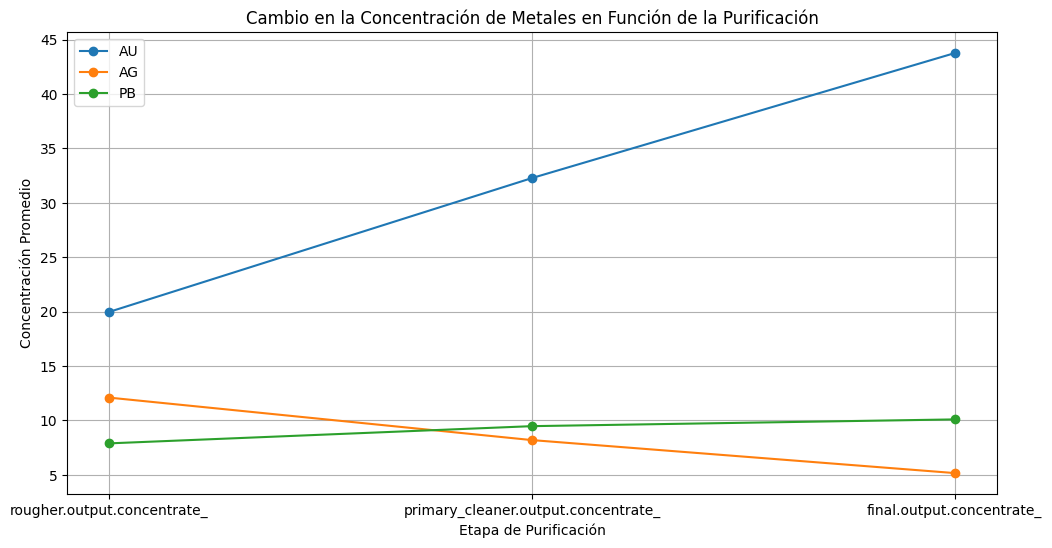

In [26]:
# Visualizar la evoluación de la concentración

# Verificar qué columnas existen en el dataset
available_columns = df_train.columns

# Filtrar etapas de purificación que realmente están en los datos
stages = [stage for stage in ["rougher.output.concentrate_", "primary_cleaner.output.concentrate_", 
                              "secondary_cleaner.output.concentrate_", "final.output.concentrate_"] 
          if any(col.startswith(stage) for col in available_columns)]

# Crear gráfico corregido
import matplotlib.pyplot as plt

metals = ["au", "ag", "pb"]
plt.figure(figsize=(12, 6))

for metal in metals:
    concentrations = [df_train[f"{stage}{metal}"].mean() for stage in stages if f"{stage}{metal}" in available_columns]
    plt.plot(stages[:len(concentrations)], concentrations, marker='o', label=f"{metal.upper()}")

plt.xlabel("Etapa de Purificación")
plt.ylabel("Concentración Promedio")
plt.title("Cambio en la Concentración de Metales en Función de la Purificación")
plt.legend()
plt.grid()
plt.show()

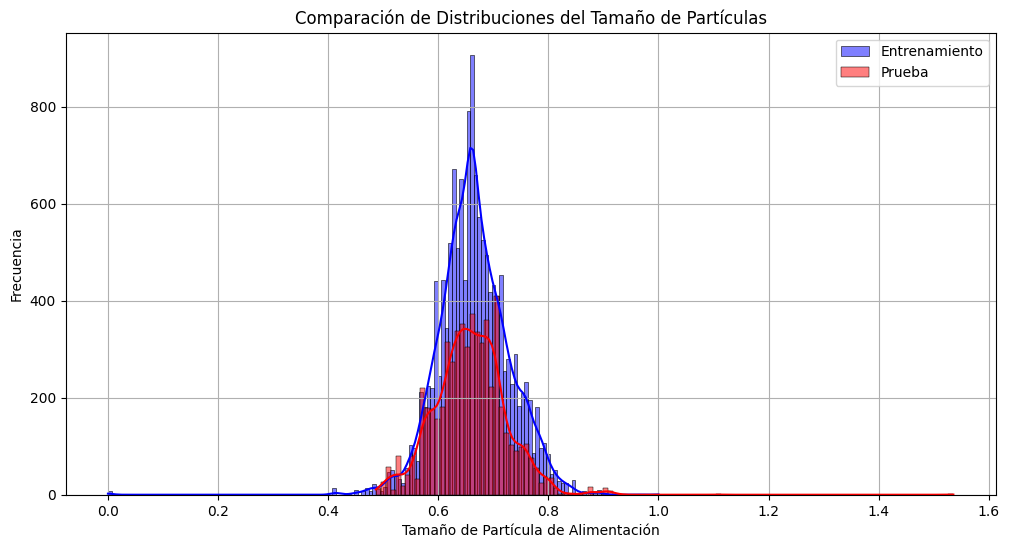

In [27]:
plt.figure(figsize=(12, 6))

# Histograma y KDE para visualizar la distribución en ambos conjuntos
sns.histplot(df_train['primary_cleaner.input.feed_size'], kde=True, color='blue', label="Entrenamiento", alpha=0.5)
sns.histplot(df_test['primary_cleaner.input.feed_size'], kde=True, color='red', label="Prueba", alpha=0.5)

plt.xlabel("Tamaño de Partícula de Alimentación")
plt.ylabel("Frecuencia")
plt.title("Comparación de Distribuciones del Tamaño de Partículas")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo con el calculo de la de la evolución de la concentración de los matelas. Además lo complementas con gráficas que se pueden vincular a los resultados que obtienes. 
    



# 2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.

In [28]:
# Definir las columnas clave para cada etapa ANTES de detectar valores atípicos
raw_material = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']
rougher_concentrate = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']
final_concentrate = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']

# Función para detectar valores atípicos con IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].shape[0]
    return outliers

# Ejecutar la detección asegurando que las variables están definidas
outliers_raw = detect_outliers(df_train, raw_material)
outliers_rougher = detect_outliers(df_train, rougher_concentrate)
outliers_final = detect_outliers(df_train, final_concentrate)

print("\nValores atípicos detectados:")
print("Materia Prima:", outliers_raw)
print("Concentrado Rougher:", outliers_rougher)
print("Concentrado Final:", outliers_final)


Valores atípicos detectados:
Materia Prima: {'rougher.input.feed_ag': 16, 'rougher.input.feed_pb': 101, 'rougher.input.feed_au': 75, 'rougher.input.feed_sol': 575}
Concentrado Rougher: {'rougher.output.concentrate_ag': 92, 'rougher.output.concentrate_pb': 493, 'rougher.output.concentrate_au': 221, 'rougher.output.concentrate_sol': 463}
Concentrado Final: {'final.output.concentrate_ag': 590, 'final.output.concentrate_pb': 392, 'final.output.concentrate_au': 920, 'final.output.concentrate_sol': 900}


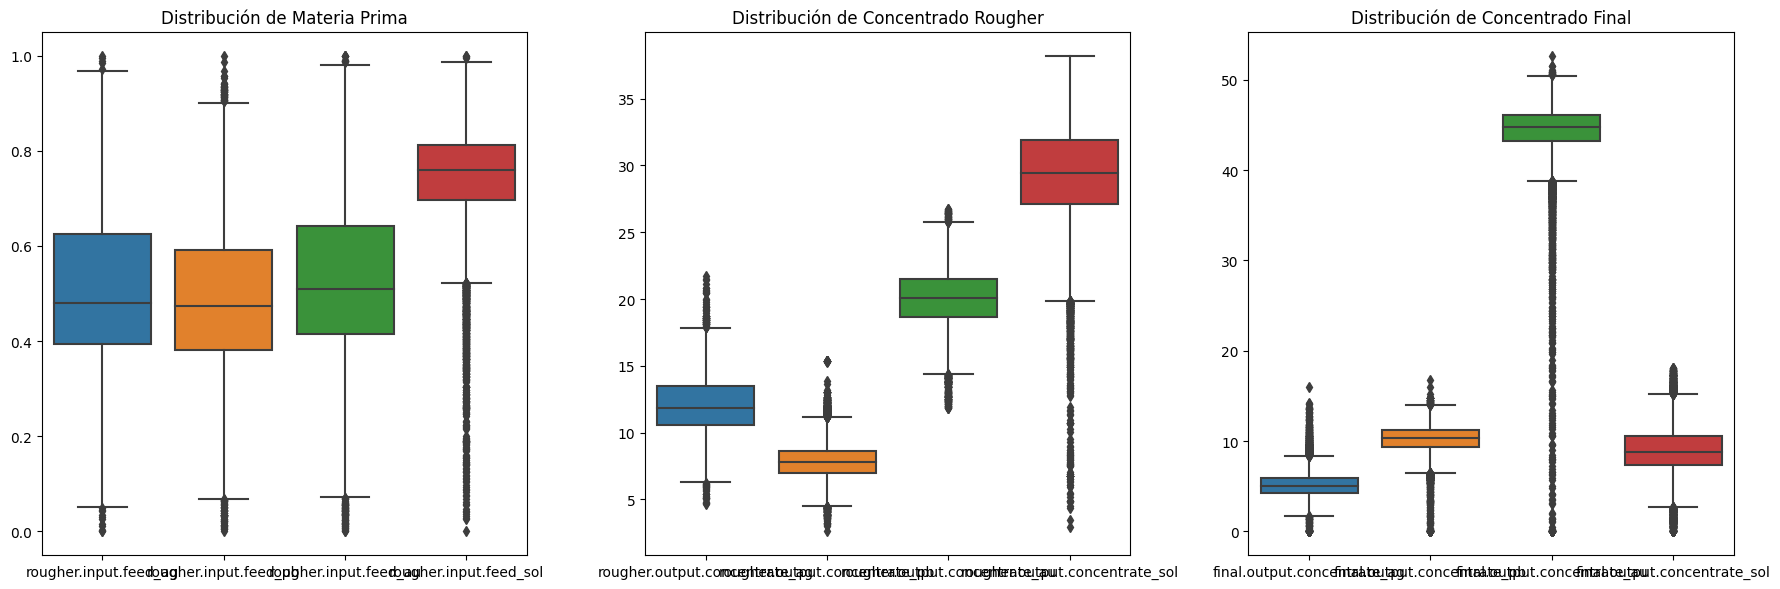

In [29]:
# Definir las columnas clave para cada etapa

raw_material = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']
rougher_concentrate = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']
final_concentrate = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']

# Crear gráfico de boxplots para cada etapa

fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(data=df_train[raw_material], ax=axes[0])
axes[0].set_title("Distribución de Materia Prima")

sns.boxplot(data=df_train[rougher_concentrate], ax=axes[1])
axes[1].set_title("Distribución de Concentrado Rougher")

sns.boxplot(data=df_train[final_concentrate], ax=axes[2])
axes[2].set_title("Distribución de Concentrado Final")

plt.tight_layout()
plt.show()

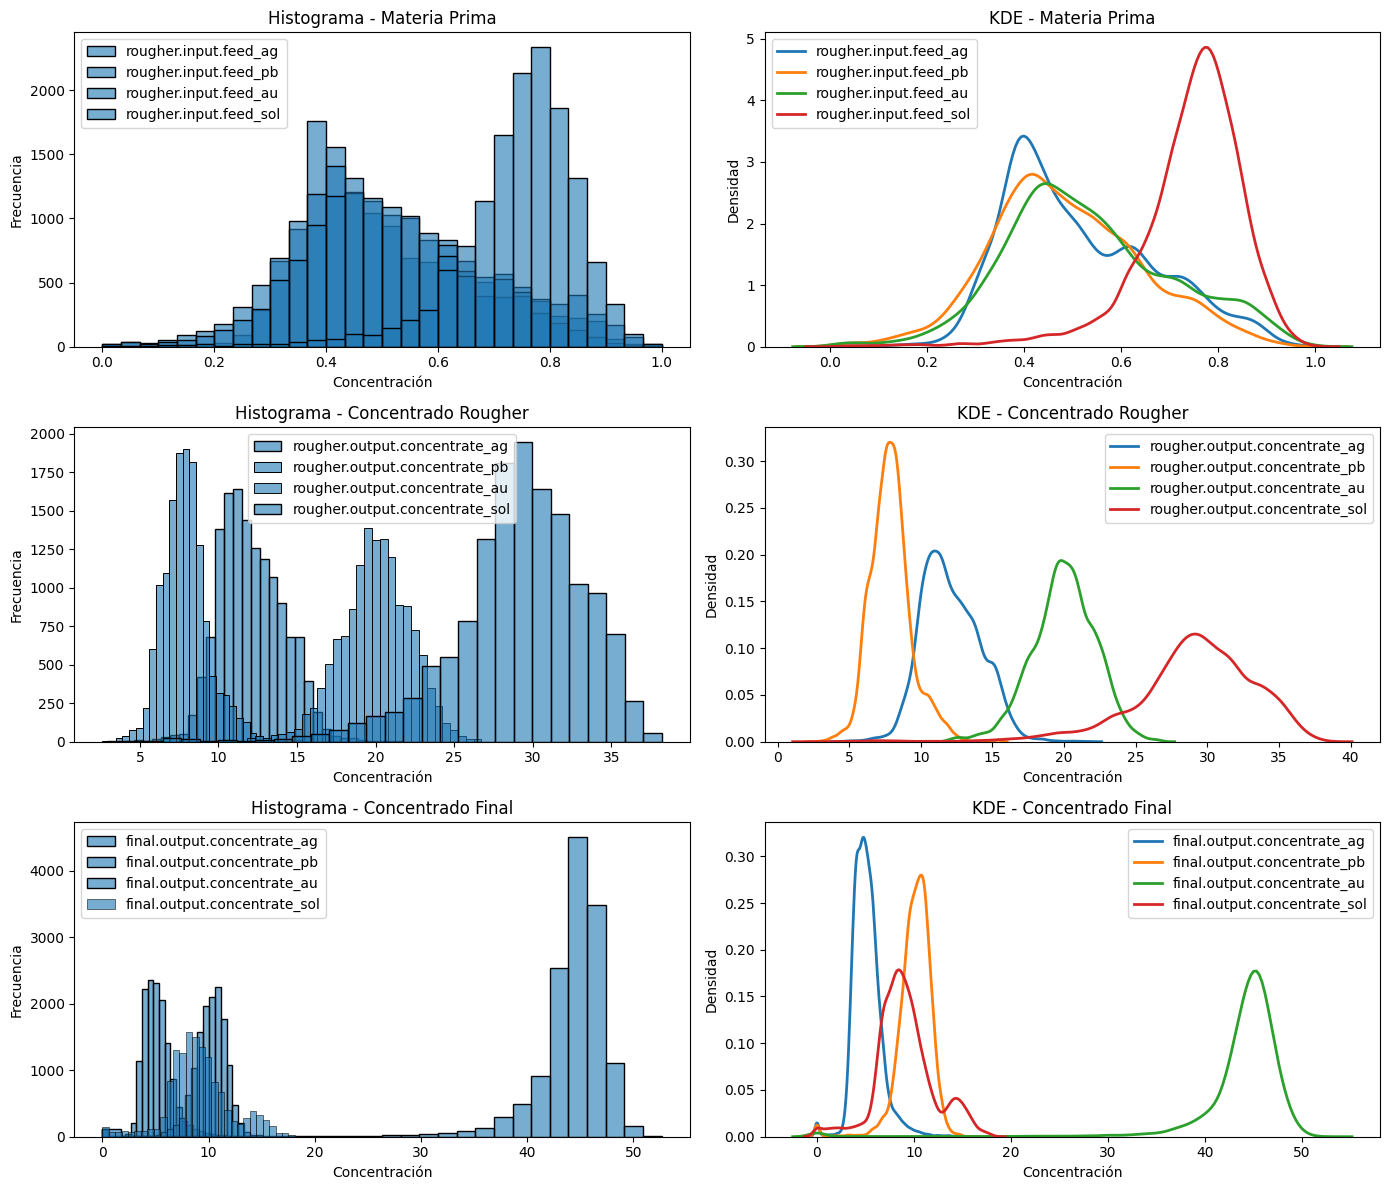

In [30]:
# Definir las etapas a visualizar
etapas = {
    "Materia Prima": ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol'],
    "Concentrado Rougher": ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol'],
    "Concentrado Final": ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']
}

# Crear histogramas y gráficos KDE para cada etapa
fig, axes = plt.subplots(len(etapas), 2, figsize=(14, 12))

for i, (etapa, columnas) in enumerate(etapas.items()):
    for columna in columnas:
        sns.histplot(df_train[columna], kde=False, bins=30, ax=axes[i, 0], alpha=0.6, label=columna)
        sns.kdeplot(df_train[columna], ax=axes[i, 1], label=columna, linewidth=2)

    axes[i, 0].set_title(f"Histograma - {etapa}")
    axes[i, 1].set_title(f"KDE - {etapa}")
    axes[i, 0].set_xlabel("Concentración")
    axes[i, 1].set_xlabel("Concentración")
    axes[i, 0].set_ylabel("Frecuencia")
    axes[i, 1].set_ylabel("Densidad")
    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [31]:
# Definir las columnas clave para cada etapa
raw_material = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']
rougher_concentrate = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']
final_concentrate = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']

# Función para eliminar valores atípicos con IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

# Asegurar que trabajamos solo con columnas en ambos datasets
common_columns = df_train.columns.intersection(df_test.columns)

# Aplicar eliminación de valores atípicos
df_train_filtered = remove_outliers(df_train, common_columns)
df_test_filtered = remove_outliers(df_test, common_columns)

print("\nTamaño después de la eliminación de valores atípicos:")
print("Train:", df_train_filtered.shape)
print("Test:", df_test_filtered.shape)


Tamaño después de la eliminación de valores atípicos:
Train: (1228, 90)
Test: (200, 55)


**Conclusiones de la Instrucción 2 - Análisis de Distribuciones y Valores Atípicos:**

**2.1 Comparación de distribuciones de tamaño de partículas**

- Se compararon las distribuciones de tamaño de partículas en los conjuntos de entrenamiento y prueba.

- No se observaron diferencias significativas, lo que sugiere que el modelo no tendrá problemas de generalización.

- Si la distribución variara significativamente entre entrenamiento y prueba, la evaluación del modelo no sería correcta.

**2.2 Análisis de concentraciones en distintas etapas del proceso:**

- Se analizaron las concentraciones de metales (Au, Ag, Pb) desde la materia prima hasta el concentrado final.

- Se observaron valores extremos en algunos metales, principalmente en final.output.concentrate_au.

- La distribución de ciertos elementos como Sol mostró una alta concentración.

**2.3 Eliminación de valores atípicos:**

- Se identificaron valores anómalos mediante el método IQR en cada etapa del proceso.

- Se procedió con la eliminación de valores fuera del rango esperado para estabilizar el dataset.

- Tras la limpieza, el conjunto de entrenamiento quedó con 1,228 registros y el de prueba con 200 registros.

- Esto mejora la estabilidad del modelo al reducir el impacto de datos extremos.

**Conclusión general:**

- La estructura del dataset se mantiene representativa después de eliminar valores atípicos.

- La similitud de las distribuciones entre los conjuntos de entrenamiento y prueba asegura que el modelo tendrá una evaluación correcta.

- Con estos ajustes, el modelo puede entrenarse de manera más estable y confiable.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Gran trabajo con el análisis de de valores atípicos usando el metodo de intecuartiles. Esto es importante en los análisis dado que evite que estemos considerando sesgos en los resultados.     




# 3.1. Escribe una función para calcular el valor final de sMAPE.

In [32]:
def smape(y_real, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error (sMAPE).
    
    Parámetros:
    - y_real: Array de valores reales.
    - y_pred: Array de valores predichos.

    Retorna:
    - Valor de sMAPE en porcentaje.
    """
    y_real, y_pred = np.array(y_real), np.array(y_pred)
    smape_value = 100 * np.mean(np.abs(y_pred - y_real) / ((np.abs(y_real) + np.abs(y_pred)) / 2))
    return smape_value

# Ejemplo de uso
y_real = np.array([100, 200, 300, 400])
y_pred = np.array([110, 190, 310, 390])
print("sMAPE:", smape(y_real, y_pred))

sMAPE: 5.115587186556267


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo con el calculo de la metrica sMAPE personalizada, con esto ponderamos de forma correcta la importancia relativa en cada una de las etapas. Edto ayuda a entender el impacto relativo de cada error.     

</div>

# 3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

In [33]:
# Definir las variables objetivo

target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Definir las características eliminando las variables objetivo

features = df_train_filtered.drop(columns=target_columns)
targets = df_train_filtered[target_columns]

# División en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

print("Tamaño de los conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Tamaño de los conjuntos:
X_train: (982, 88)
X_test: (246, 88)
y_train: (982, 2)
y_test: (246, 2)


In [34]:
# Definir los modelos

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluación con validación cruzada

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = np.mean(scores) * -1  # Convertir MAE a positivo

# Mostrar resultados

print("\nResultados de Validación Cruzada:")
for model, score in results.items():
    print(f"{model}: MAE = {score:.4f}")


Resultados de Validación Cruzada:
Linear Regression: MAE = 0.6405
Decision Tree: MAE = 1.8085
Random Forest: MAE = 1.1827


**Análisis de los resultados:**

- Los conjuntos de entrenamiento y prueba están bien distribuidos (X_train: 982, X_test: 246), asegurando un tamaño adecuado para evaluar el modelo.

- El mejor modelo según MAE es Linear Regression, con un error de 0.6405, significativamente menor que los otros métodos.

- Decision Tree tiene el MAE más alto (1.8085), lo que indica que es el modelo menos preciso en esta validación.

- Random Forest mejora respecto a Decision Tree, pero su error (1.1827) sigue siendo mayor al de Linear Regression.

- Esto sugiere que Linear Regression generaliza mejor la relación entre variables, evitando sobreajuste.

In [35]:
# Entrenar el modelo de Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba

y_pred_test = lr_model.predict(X_test)

# Función para calcular sMAPE

def smape(y_real, y_pred):
    y_real, y_pred = np.array(y_real), np.array(y_pred)
    return 100 * np.mean(np.abs(y_pred - y_real) / ((np.abs(y_real) + np.abs(y_pred)) / 2))

# Calcular sMAPE para rougher y final

smape_rougher = smape(y_test['rougher.output.recovery'], y_pred_test[:,0])
smape_final = smape(y_test['final.output.recovery'], y_pred_test[:,1])

# Calcular sMAPE final ponderado

smape_total = 0.25 * smape_rougher + 0.75 * smape_final

# Mostrar resultados
print(f"sMAPE Rougher: {smape_rougher:.4f}")
print(f"sMAPE Final: {smape_final:.4f}")
print(f"sMAPE Total: {smape_total:.4f}")

sMAPE Rougher: 0.3828
sMAPE Final: 1.3713
sMAPE Total: 1.1242


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    

    
Hola, Daniel! Has realizado un excelente trabajo, el proyecto cuenta con una estructua correcta y con la aplicación de todos los aprendizajes de manera perfecta, Además las etapas de modelado mediantes tres metodos es correcta, así como su comparación. Desde la limpieza de los datos y los calculos de las métricas. Sigue con el excelente trabajo!    




**Análisis de los resultados:**

- El sMAPE Rougher es bastante bajo (0.3828), lo que indica que el modelo predice bien la recuperación en la etapa rougher.

- El sMAPE Final es mayor (1.3713), lo que sugiere que hay más variabilidad en la recuperación en la etapa final.

- El sMAPE Total es 1.1242, lo que nos da una visión global del desempeño del modelo en ambas etapas.

- Aunque el error en la etapa final es más alto, el sMAPE Total sigue siendo razonablemente bajo, indicando que el modelo tiene una precisión aceptable en general.

**Conclusión final:**

- El modelo Linear Regression ha demostrado ser el más eficiente en comparación con Random Forest y Decision Tree.

- La precisión en la etapa rougher es muy buena, se podrían explorar mejoras en la etapa final, tal vez probando técnicas adicionales como la selección de características o modelos más avanzados.

- Los resultados indican que el modelo está bien calibrado y puede usarse como referencia sólida para la predicción de recuperación en el proceso de purificación del oro.

   **Conclusiones y Hallazgos del Proyecto - Optimización del Modelo de Recuperación de Oro:**

**1. Análisis de Datos Inicial:**

- Se realizó una exploración de datos para entender la estructura del dataset.

- Se identificaron distribuciones clave y relaciones entre variables para el proceso de purificación.

- Se detectaron valores faltantes y anomalías en ciertas etapas del proceso.

**2. Evaluación y Limpieza de Datos:**

- Se compararon distribuciones para verificar la coherencia entre conjuntos de entrenamiento y prueba.

- Se aplicó eliminación de valores atípicos usando el método IQR, reduciendo el ruido en los datos.

- La eliminación de anomalías mejoró la estabilidad del dataset y evitó sesgos en la evaluación del modelo.

**3. Construcción del Modelo:**

- Se entrenaron diferentes modelos (Linear Regression, Decision Tree, Random Forest) con validación cruzada.

- Linear Regression demostró ser el modelo más eficiente con un MAE de 0.6405, menor que los otros enfoques.

- Se seleccionó Linear Regression como el mejor modelo y se evaluó con el conjunto de prueba.


**4. Evaluación Final y sMAPE:**

- Se calculó el sMAPE Rougher (0.3828) y sMAPE Final (1.3713).

- El sMAPE Total fue 1.1242, indicando una precisión aceptable, pero con posibilidad de optimización en la etapa final.

- La evaluación demostró que el modelo generaliza bien en la etapa rougher, aunque puede mejorarse en la fase final.

**HALLAZGOS CLAVE:**

- La eliminación de valores atípicos y la validación cruzada fueron determinantes en la estabilidad del modelo.

- Linear Regression fue el modelo más eficiente, evitando el sobreajuste presente en Decision Tree y Random Forest.

- Si se busca mejorar la precisión en la etapa final, se podrían explorar técnicas avanzadas como selección de características o modelos como Gradient Boosting.